# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_name = []
country = []
latitude = []
longitude = []
weather_date = []
temp = []
humidity = []
cloudiness = []
wind_speed = []


# For each cities in cities list, get data
for city in range(len(cities)):
    try:
        response = requests.get(query_url + cities[city]).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        weather_date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        
    
            
        print(f"Processing city number {city} : {cities[city]}") 
  
    except(KeyError, IndexError):
        print("City not found. Next city...")


print("City Data Complete")


City not found. Next city...
Processing city number 1 : villafranca de los barros
Processing city number 2 : souillac
Processing city number 3 : salalah
Processing city number 4 : saint george
Processing city number 5 : ternate
Processing city number 6 : barrow
Processing city number 7 : lebu
City not found. Next city...
Processing city number 9 : jamestown
Processing city number 10 : hithadhoo
Processing city number 11 : hilo
Processing city number 12 : ushuaia
Processing city number 13 : scarborough
Processing city number 14 : tasiilaq
Processing city number 15 : busselton
City not found. Next city...
Processing city number 17 : pitkyaranta
Processing city number 18 : pochutla
Processing city number 19 : yellowknife
Processing city number 20 : ribeira grande
Processing city number 21 : kaitangata
Processing city number 22 : rikitea
Processing city number 23 : qaanaaq
Processing city number 24 : butaritari
Processing city number 25 : sept-iles
Processing city number 26 : vaini
Process

Processing city number 220 : antofagasta
City not found. Next city...
Processing city number 222 : vanavara
Processing city number 223 : ilhabela
Processing city number 224 : miyang
Processing city number 225 : portland
Processing city number 226 : hamilton
Processing city number 227 : mungwi
Processing city number 228 : bambanglipuro
Processing city number 229 : katherine
Processing city number 230 : miandrivazo
Processing city number 231 : iguguno
Processing city number 232 : torbay
Processing city number 233 : zlynka
Processing city number 234 : khatanga
Processing city number 235 : kalemie
Processing city number 236 : bilibino
Processing city number 237 : hermanus
Processing city number 238 : khor
Processing city number 239 : esmeraldas
Processing city number 240 : riyadh
Processing city number 241 : upernavik
Processing city number 242 : marrakesh
Processing city number 243 : mareeba
Processing city number 244 : ilulissat
City not found. Next city...
Processing city number 246 : t

Processing city number 441 : anadyr
Processing city number 442 : ghanzi
Processing city number 443 : hualmay
Processing city number 444 : payyannur
Processing city number 445 : cidreira
Processing city number 446 : biak
Processing city number 447 : krasnoborsk
City not found. Next city...
Processing city number 449 : black forest
City not found. Next city...
Processing city number 451 : namatanai
Processing city number 452 : kapustin yar
Processing city number 453 : blagoyevo
Processing city number 454 : umm lajj
Processing city number 455 : nizwa
Processing city number 456 : yerbogachen
Processing city number 457 : geraldton
Processing city number 458 : olga
Processing city number 459 : axim
Processing city number 460 : seoul
Processing city number 461 : innisfail
Processing city number 462 : lamu
City not found. Next city...
Processing city number 464 : husavik
Processing city number 465 : bulaevo
Processing city number 466 : gwadar
Processing city number 467 : narsaq
Processing city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
weather_df = pd.DataFrame({'City' : city_name,
                          'Country' : country ,
                          'Lat' : latitude , 
                          'Lng' : longitude ,
                          'Date' : weather_date ,
                          'Max Temp' : temp ,
                          'Humidity' : humidity ,
                          'Cloudiness' : cloudiness ,
                          'Wind Speed' : wind_speed })
weather_df.to_csv("../output_data/cities.csv", index = False)

In [25]:
weather_df

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Villafranca de los Barros,ES,38.56,-6.34,1608158858,51.01,96,85,1.01
1,Souillac,MU,-20.52,57.52,1608158847,77.00,88,40,11.41
2,Salalah,OM,17.02,54.09,1608158859,69.80,77,20,2.24
3,Saint George,US,37.10,-113.58,1608158859,52.00,31,1,3.36
4,Ternate,ID,0.80,127.40,1608158859,82.38,77,100,13.09
...,...,...,...,...,...,...,...,...,...
555,Verāval,IN,20.90,70.37,1608158942,66.83,58,0,14.83
556,Tucumcari,US,35.17,-103.72,1608158943,51.80,23,1,6.93
557,Hasaki,JP,35.73,140.83,1608158943,24.80,85,20,4.70
558,Kyzyl-Suu,KG,42.34,78.01,1608158943,17.76,77,58,7.78


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
weather_df['Humidity'].astype(float)
weather_sorted = weather_df.sort_values(by='Humidity', ascending=False)
weather_sorted
#Sorted shows none are above 100 in this example. However, function added if data is remeasured and increases above 100%

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
366,Vardø,NO,70.37,31.11,1608158913,23.00,100,75,11.41
149,Horana,LK,6.72,80.06,1608158880,75.20,100,40,3.36
66,Imeni Vorovskogo,RU,55.72,38.34,1608158868,28.40,100,90,6.71
457,Marabu,MY,4.41,114.01,1608158927,75.20,100,40,2.24
463,Aljezur,PT,37.32,-8.80,1608158928,51.01,100,20,1.01
...,...,...,...,...,...,...,...,...,...
437,Chino Valley,US,34.76,-112.45,1608158760,55.00,17,1,9.17
442,Portales,US,34.19,-103.33,1608158925,51.80,17,1,3.94
112,Comodoro Rivadavia,AR,-45.87,-67.50,1608158875,82.40,17,0,18.34
245,Hermosillo,MX,29.07,-110.97,1608158895,75.99,15,0,4.00


In [27]:
#  Get the indices of cities that have humidity over 100%.


In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df[weather_df.Humidity <= 100]
clean_city_data

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Villafranca de los Barros,ES,38.56,-6.34,1608158858,51.01,96,85,1.01
1,Souillac,MU,-20.52,57.52,1608158847,77.00,88,40,11.41
2,Salalah,OM,17.02,54.09,1608158859,69.80,77,20,2.24
3,Saint George,US,37.10,-113.58,1608158859,52.00,31,1,3.36
4,Ternate,ID,0.80,127.40,1608158859,82.38,77,100,13.09
...,...,...,...,...,...,...,...,...,...
555,Verāval,IN,20.90,70.37,1608158942,66.83,58,0,14.83
556,Tucumcari,US,35.17,-103.72,1608158943,51.80,23,1,6.93
557,Hasaki,JP,35.73,140.83,1608158943,24.80,85,20,4.70
558,Kyzyl-Suu,KG,42.34,78.01,1608158943,17.76,77,58,7.78


In [29]:
#Renames clean_city_data to weather_df to be passed into plots below
weather_df = clean_city_data


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

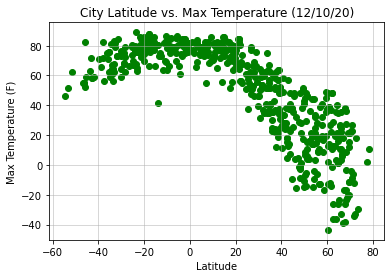

This plot shows the comparison of temperature and latitude. As the latitude moves further away from 0 the temperature decrease, because you are also moving further away from the equator


In [30]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "green")

# Set title
plt.title("City Latitude vs. Max Temperature (12/10/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")

plt.show()
print ('This plot shows the comparison of temperature and latitude. As the latitude moves further away from 0 the temperature decrease, because you are also moving further away from the equator')

## Latitude vs. Humidity Plot

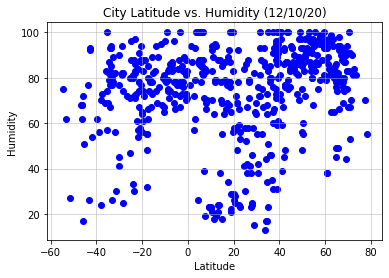

The comparison of humidity and latitude does not show a trend in data. Although humidity tends to be focused higher around latitude 0 (the equator)


In [31]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "blue")


plt.title("City Latitude vs. Humidity (12/10/20)")


plt.xlabel("Latitude")


plt.ylabel("Humidity")


plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("Images/City Latitude vs Humidity.png")

plt.show()

print("The comparison of humidity and latitude does not show a trend in data. Although humidity tends to be focused higher around latitude 0 (the equator)")

## Latitude vs. Cloudiness Plot

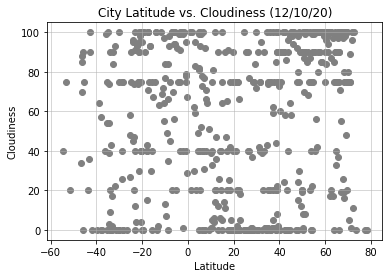

Cloudiness shows no correllation with latitude and seems to be evenly dispersed over all latitudes


In [32]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "grey")


plt.title("City Latitude vs. Cloudiness (12/10/20)")


plt.xlabel("Latitude")


plt.ylabel("Cloudiness")


plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("Images/City Latitude vs Cloudiness.png")

plt.show()

print('Cloudiness shows no correllation with latitude and seems to be evenly dispersed over all latitudes')

## Latitude vs. Wind Speed Plot

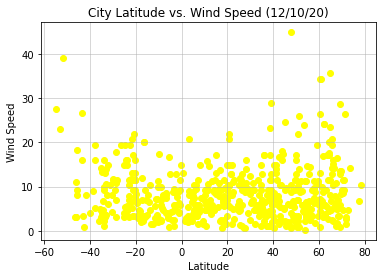

When comparing wind speed with latitude it can be seen that wind spends generally increases as latitude moves away from 0 (the equatore)


In [33]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "yellow")


plt.title("City Latitude vs. Wind Speed (12/10/20)")


plt.xlabel("Latitude")


plt.ylabel("Wind Speed")


plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("Images/City Latitude vs Wind Speed.png")

plt.show()

print('When comparing wind speed with latitude it can be seen that wind spends generally increases as latitude moves away from 0 (the equatore)')

## Linear Regression

In [34]:
northern_hemi = weather_df.loc[weather_df['Lat'] >= 0]
southern_hemi = weather_df.loc[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7090317742938278


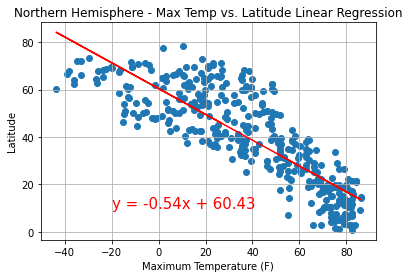

In the Northern Hemisphere as latitude increases the maximum temperature decreases. The r value is close to 1 for this data shows there is good correlation between latitude and maximum temperature.


<Figure size 432x288 with 0 Axes>

In [35]:
x_values = northern_hemi['Max Temp']
y_values = northern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Maximum Temperature (F)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Northern Hemisphere vs Max Temp LR.png")

print('In the Northern Hemisphere as latitude increases the maximum temperature decreases. The r value is close to 1 for this data shows there is good correlation between latitude and maximum temperature.')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3241787077477794


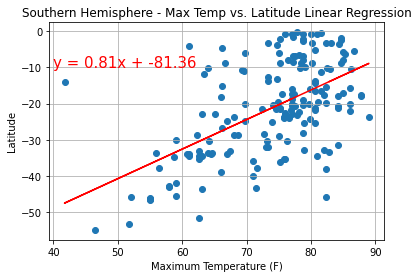

In the southern hemisphere the opposite relationship is true and as latitude decreases the temperature also decreases. However, the r value for this data is not as close to 1 indicating the correlation between latitude and temperature is not as great in the southern hemisphere.


<Figure size 432x288 with 0 Axes>

In [36]:
x_values = southern_hemi['Max Temp']
y_values = southern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(line_eq,(40,-10),fontsize=15,color="red")
plt.xlabel('Maximum Temperature (F)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Southern Hemisphere vs Max Temp LR.png")

print('In the southern hemisphere the opposite relationship is true and as latitude decreases the temperature also decreases. However, the r value for this data is not as close to 1 indicating the correlation between latitude and temperature is not as great in the southern hemisphere.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0973572408157887


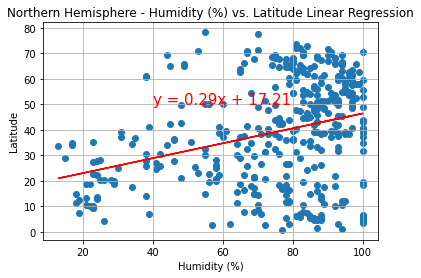

For humidity compared to latitude the r value is almost 0 meaning there is little correlation between latitude and humidity.


<Figure size 432x288 with 0 Axes>

In [37]:
x_values = northern_hemi['Humidity']
y_values = northern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Northern Hemisphere vs Humidity LR.png")

print('For humidity compared to latitude the r value is almost 0 meaning there is little correlation between latitude and humidity.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08783516484237577


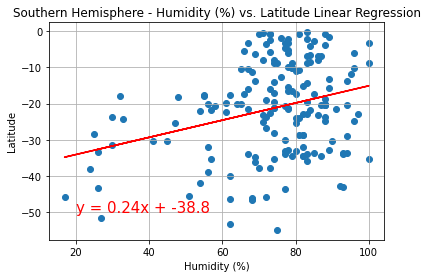

For humidity compared to latitude the r value is almost 0 meaning there is little correlation between latitude and humidity. This observation is true in the southern hemipshere as well.


<Figure size 432x288 with 0 Axes>

In [38]:
x_values = southern_hemi['Humidity']
y_values = southern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Southern Hemisphere vs Humidity LR.png")

print('For humidity compared to latitude the r value is almost 0 meaning there is little correlation between latitude and humidity. This observation is true in the southern hemipshere as well.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1052987421140151


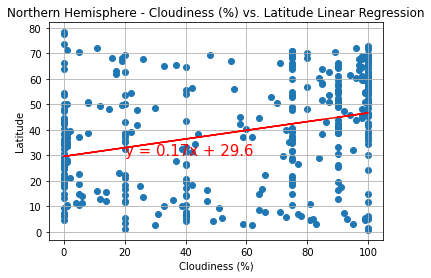

The r value for cloudiness vs latitude in the nothern hemisphere is almost 0. Indicating there is no correllation in this data.


<Figure size 432x288 with 0 Axes>

In [39]:
x_values = northern_hemi['Cloudiness']
y_values = northern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Northern Hemisphere vs Cloudiness LR.png")

print('The r value for cloudiness vs latitude in the nothern hemisphere is almost 0. Indicating there is no correllation in this data.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07113318544117819


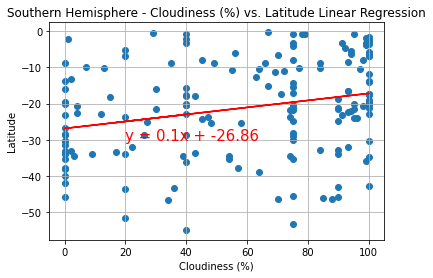

The r value for cloudiness vs latitude in the southern hemisphere is almost 0. Indicating there is no correllation in this data.


<Figure size 432x288 with 0 Axes>

In [40]:
x_values = southern_hemi['Cloudiness']
y_values = southern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,-30),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Southern Hemisphere vs Cloudiness LR.png")

print('The r value for cloudiness vs latitude in the southern hemisphere is almost 0. Indicating there is no correllation in this data.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025698064521118124


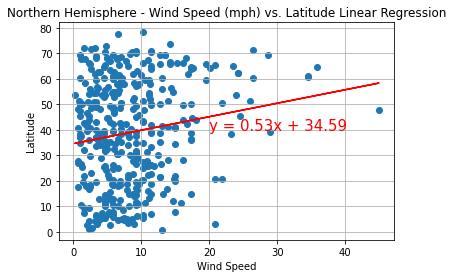

The r value for wind speed vs latitude in the northern hemisphere is almost 0. Indicating there is no correllation in this data.


<Figure size 432x288 with 0 Axes>

In [41]:
x_values = northern_hemi['Wind Speed']
y_values = northern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Northern Hemisphere vs Wind Speed LR.png")

print('The r value for wind speed vs latitude in the northern hemisphere is almost 0. Indicating there is no correllation in this data.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08017874192697452


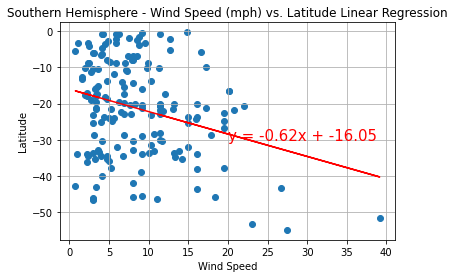

The r value for wind speed vs latitude in the southern hemisphere is almost 0. Indicating there is no correllation in this data.


<Figure size 432x288 with 0 Axes>

In [42]:
x_values = southern_hemi['Wind Speed']
y_values = southern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,-30),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Southern Hemisphere vs Wind Speed LR.png")

print('The r value for wind speed vs latitude in the southern hemisphere is almost 0. Indicating there is no correllation in this data.')

In [43]:
# Observations
# 1. Maximum temperature will increase as you move further away from 0 Latitude (the equator)
# 2. Humidity is highest and most concentrated at higher values closer to 0 latitude.
# 3. Wind speeds tend to increase as you move further away from 0 latitude. However, there is not a strong correlation between latitude and wind speed.